# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "GIN-12"
COLLABORATORS = "Anna Staniszewska, Rafał Żegleń, Zuzanna Słobodzian"

---

## Zestaw zadań 1: Generowanie procesów punktowych

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

### Zadanie 1: Proces regularny z komponentem losowym w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `regular_on_rectangle()`, która będzie generować proces regularny z komponentem losowym w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1) Generujemy punkty na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty są oddalone od krawędzi obszaru odpowiednio o $\frac{1}{2} d_x$ w poziomie i $\frac{1}{2}d_y$ w pionie.
2) Do współrzędnych każdego z punktów dodajemy komponent losowy określony wzorem $r \cdot rand$ , gdzie $r$ to parametr określający wielkość komponentu losowego, a $rand$ to wartość wylosowana z rozkładu jednostajnego na przedziale $[-\frac{1}{2} d_x, \frac{1}{2} d_x]$ w przypadku współrzędnej $x$ i na przedziale $[-\frac{1}{2} d_y, \frac{1}{2} d_y]$ w przypadku współrzędnej $y$.

Parametry przykładowego rozkładu:
 - liczba punktów w poziomie: 20
 - liczba punktów w pionie: 10
 - wartość współczynnika określającego siłę komponentu losowego: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10


#### a) Przygotowanie funkcji

In [4]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
   
    d_x = (x_lim[1]-x_lim[0])/grid[0]
    d_y = (y_lim[1]-y_lim[0])/grid[1]

    vector_x = np.linspace(x_lim[0]+1/2*d_x, x_lim[1]-1/2*d_x, grid[0])
    vector_y = np.linspace(y_lim[0]+1/2*d_y, y_lim[1]-1/2*d_y, grid[1])
                                                                                                                                                                                    
    matrix_x, matrix_y = np.meshgrid(vector_x, vector_y)
    
    rand_x = np.random.rand(grid[1], grid[0])*d_x-1/2*d_x
    rand_y = np.random.rand(grid[1], grid[0])*d_y-1/2*d_y

    rand_x = random_component*rand_x
    rand_y = random_component*rand_y
    
    matrix_x += rand_x
    matrix_y += rand_y
        
    array = pd.DataFrame(data={"X":matrix_x.flatten(), "Y":matrix_y.flatten()})
    
    return array

    #raise NotImplementedError()
    

#### b) Wygenerowanie procesu

In [5]:
# YOUR CODE HERE
#import random as rd
points = regular_on_rectangle([20,10], 0.5, [0,20], [0,10])
points
#raise NotImplementedError()

,X,Y
0,0.277446,0.571291
1,1.389026,0.621163
2,2.374176,0.632814
3,3.456395,0.349995
4,4.425661,0.342708
...,...,...
195,15.411911,9.300557
196,16.612229,9.493571
197,17.587595,9.511605
198,18.610943,9.605369


#### c) Wizualizacja

Text(0, 0.5, 'Y')

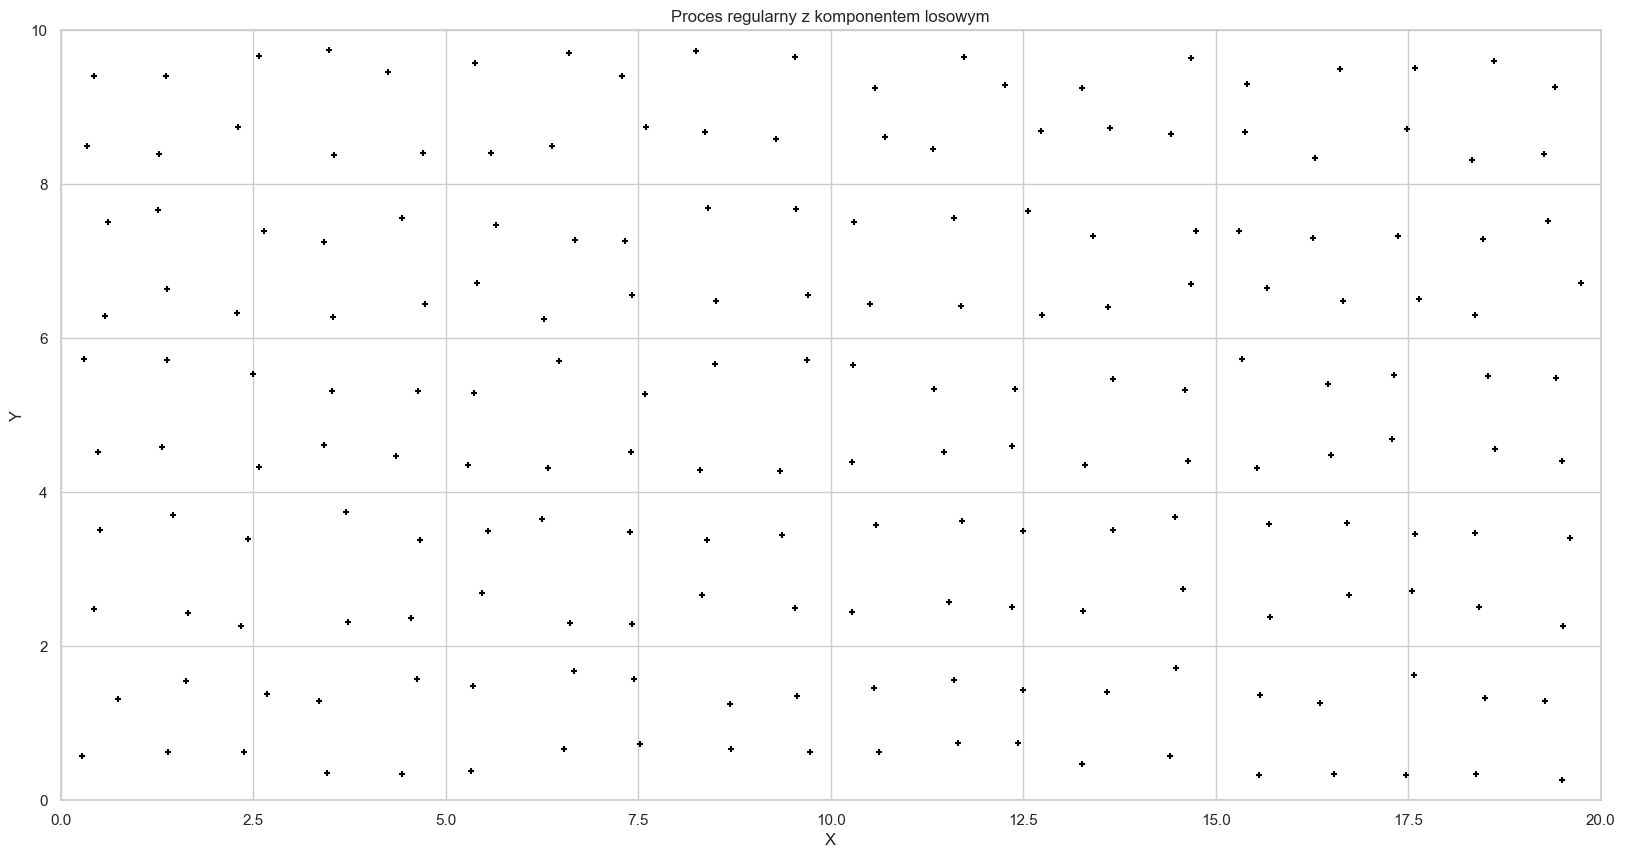

In [6]:
# YOUR CODE HERE
# fig,ax = plt.subplots(1, 1, figsize = (20,10))
# im = plt.scatter(points["X"], points["Y"], c = "black", s = 25, marker = "+")
# plt.xlim(0, 20)
# plt.ylim(0, 10)
# plt.title("Proces regularny z komponentem losowym")
# plt.xlabel("X")
# plt.ylabel("Y")

fig,ax = plt.subplots(1, 1, figsize = (20,10))
ax.scatter(points["X"], points["Y"], c = "black", s = 25, marker = "+")
ax.axis("square")
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.set_title("Proces regularny z komponentem losowym")
ax.set_xlabel("X")
ax.set_ylabel("Y")

#raise NotImplementedError()

### Zadanie 2: Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `homogeneous_poisson_on_rectangle()`, która będzie generować jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Losujemy liczbę punktów $n$ z rozkładu Poissona o wartości oczekiwanej równej $i \cdot a$, gdzie $i$ to intensywność procesu, a $a$ jest powierzchnią obszaru, na którym generujemy punkty.
2. Niezależnie od siebie losujemy wartości współrzędnych $n$ punktów z rozkładów jednostajnych na przedziałach określonych przez przyjęte zakresy wartości współrzędnych $x$ i $y$.

Parametry przykładowego rozkładu:
 - intensywność procesu: 10
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [10]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    expected_value = intensity*(x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0])
    n = np.random.poisson(expected_value)
   
    x = np.random.uniform(x_lim[0],x_lim[1],n)
    y = np.random.uniform(y_lim[0],y_lim[1],n)
    
    array = pd.DataFrame(data={"X":x.flatten(), "Y":y.flatten()})
    
    return array
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [11]:
# YOUR CODE HERE
# poisson =  homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim)
poisson = homogeneous_poisson_on_rectangle(10, [0,20], [0,10])
poisson
#raise NotImplementedError()

,X,Y
0,4.127494,6.080832
1,3.840357,1.181355
2,19.395295,8.553479
3,9.578099,3.460029
4,7.474867,0.988368
...,...,...
2038,8.735253,8.484357
2039,9.777875,3.253230
2040,8.775971,9.993769
2041,6.497212,4.385540


#### c) Wizualizacja

Text(0, 0.5, 'Y')

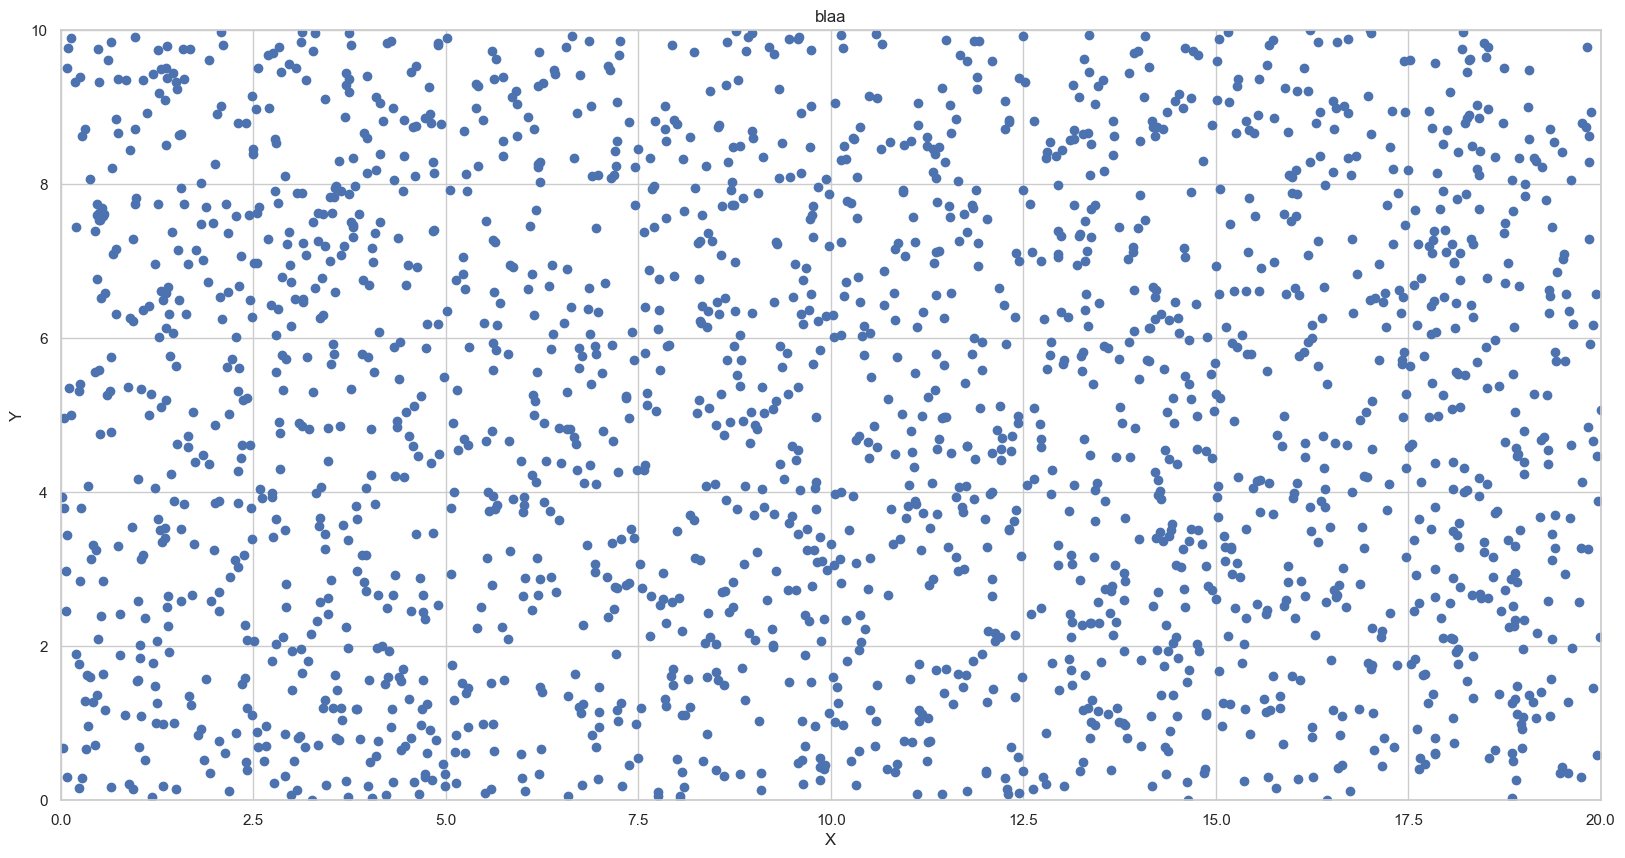

In [15]:
# YOUR CODE HERE
fig,ax = plt.subplots(1, 1, figsize = (20,10))
ax.scatter(poisson["X"], poisson["Y"], c = "black", s = 25, marker = "+")
ax.axis("square")
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.set_title("Jednorodny proces Poissona")
ax.set_xlabel("X")
ax.set_ylabel("Y")
#raise NotImplementedError()

### Zadanie 3: Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `unhomogeneous_poisson_on_rectangle()`, która będzie generować niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Generujemy punkty z wykorzystaniem jednorodnego procesu Poissona przyjmując intensywność procesu równą maksymalnej wartości jaką osiąga funkcja intensywności w analizowanym obszarze.
2. Przerzedzamy rozkład usuwając z niego punkty z prawdopodobieństwem równym $1-\frac{i}{i_{max}}$, gdzie $i$ to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu, a $i_{max}$ to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru.

Parametry przykładowego rozkładu:
 - intensywność procesu: f(x, y) = x
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [10]:
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """

    # YOUR CODE HERE
    def temp(x):
        return -f(x[0], x[1])
    
    intensity_max = -sp.optimize.minimize(temp, [(x_lim[0]+x_lim[1])/2, (y_lim[0]+y_lim[1])/2], bounds = [x_lim, y_lim]).fun
    
    n_array = homogeneous_poisson_on_rectangle(intensity_max, x_lim, y_lim)
    
    i_max = intensity_max
    for i in range(len(n_array)):
        if np.random.rand()<(1-f(n_array["X"][i],n_array["Y"][i])/i_max):
            n_array = n_array.drop(i)
            i-=1
    
    return n_array
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [11]:
# YOUR CODE HERE
def f(x, y):
    return x
unh_poisson = unhomogeneous_poisson_on_rectangle(f, [0,20], [0,10])
unh_poisson
#raise NotImplementedError()

,X,Y
3,4.281904,6.044446
5,5.917373,4.929086
8,5.806814,1.370937
9,3.085292,7.862914
10,3.764476,6.808189
...,...,...
958,3.297182,7.559055
963,5.944300,8.951118
967,7.333996,0.113394
968,4.976410,6.922913


#### c) Wizualizacja

Text(0, 0.5, 'Y')

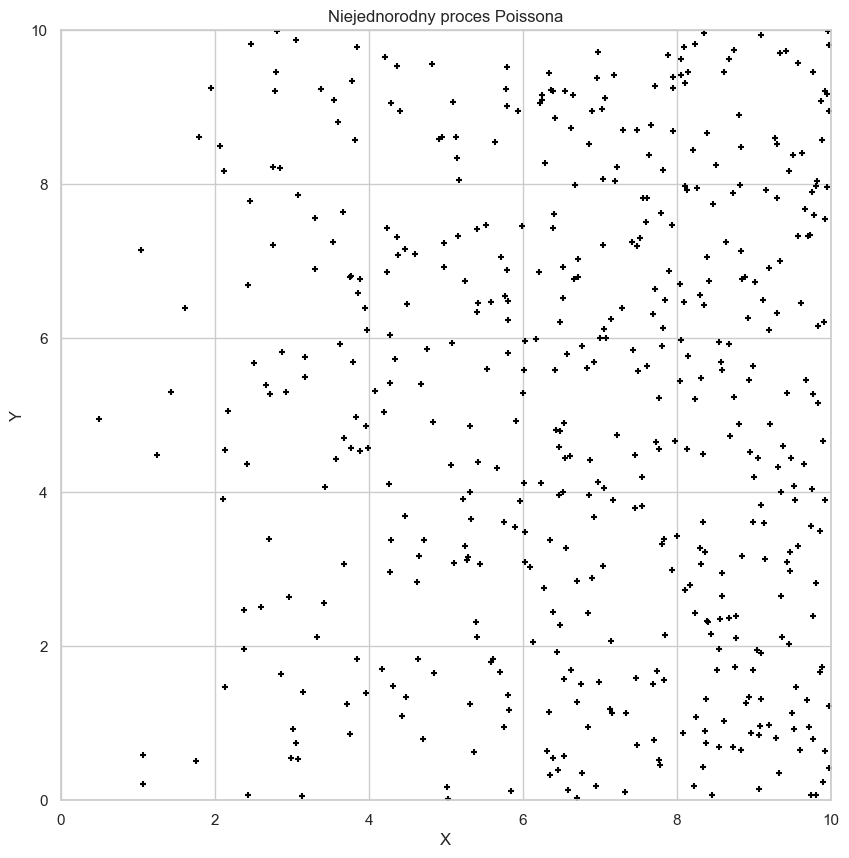

In [16]:
# YOUR CODE HERE
fig,ax = plt.subplots(1, 1, figsize = (20,10))
ax.scatter(unh_poisson["X"], unh_poisson["Y"], c = "black", s = 25, marker = "+")
ax.axis("square")
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.set_title("Niejednorodny proces Poissona")
ax.set_xlabel("X")
ax.set_ylabel("Y")
#raise NotImplementedError()

### Zadanie 4: Proces punktowy Matérna w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `materna_on_rectangle()`, która będzie generować proces punktowy Materna w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor równy wartości parametru `cluster_radius`.
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Wokół każdego z wygenerowanych punktów (okrąg o promieniu równym wartości parametru `cluster_radius`) generujemy punkty z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `daughter_intensity`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - intensywność procesu potomnego: 10
 - promień klastra: 1
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [16]:
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
#     x_lim[0] -= cluster_radius
#     x_lim[1] += cluster_radius
#     y_lim[0] -= cluster_radius
#     y_lim[1] += cluster_radius
    
#     parent_array = homogeneous_poisson_on_rectangle(parent_intensity, x_lim, y_lim)
    
#     x_circle = np.empty((1,1))
#     y_circle = np.empty((1,1))

#     for i in range(0, len(parent_array)):
#         expected_value_m = daughter_intensity*cluster_radius**2*np.pi
#         m_daughter = np.random.poisson(expected_value_m)      
#         for j in range(0, m_daughter):
#                 x = np.random.uniform(parent_array['X'][i]-cluster_radius, parent_array['X'][i]+cluster_radius)
#                 y = np.random.uniform(-(cluster_radius**2-(x-parent_array['X'][i])**2)**(1/2)+parent_array['Y'][i], (cluster_radius**2-(x-parent_array['X'][i])**2)**(1/2)+parent_array['Y'][i])
#                 x_circle = np.append(x_circle, x)
#                 y_circle = np.append(y_circle, y)
                
#     m = 0
#     while(True):
#         if x_circle[m]<(x_lim[0]+cluster_radius) or x_circle[m]>(x_lim[1]-cluster_radius)or y_circle[m]<(y_lim[0]+cluster_radius) or y_circle[m]>(y_lim[1]-cluster_radius):
#             x_circle = np.delete(x_circle, m)
#             y_circle = np.delete(y_circle, m)
#             m-=1
#         m+=1
#         if m == len(x_circle):
#             break
            
#     array = pd.DataFrame(data={"X":x_circle, "Y":y_circle})

#     return array

    a = [x_lim[0] - cluster_radius, x_lim[1] + cluster_radius]
    b = [y_lim[0] - cluster_radius, y_lim[1] + cluster_radius]
    parents = homogeneous_poisson_on_rectangle(parent_intensity, a, b)
    
    X=[]
    Y=[]
    
    for i in range(len(parents)):
        daughter = homogeneous_poisson_on_rectangle(daughter_intensity, [parents.iat[i,0]-cluster_radius, parents.iat[i,0]+cluster_radius], [parents.iat[i,1]-cluster_radius, parents.iat[i,1]+cluster_radius])
  
        for j in range(len(daughter)):
            
            if (daughter.iat[j,0]-parents.iat[i,0])**2 + (daughter.iat[j,1]-parents.iat[i,1])**2 <= cluster_radius**2:
                
                X = np.append(X, daughter.iat[j,0])
                Y = np.append(Y, daughter.iat[j,1])
                
    points = pd.DataFrame()
    points['X'] = X
    points['Y'] = Y
    
    points = points.loc[points['X'] <= x_lim[1]]
    points = points.loc[points['X'] >= x_lim[0]]
    points = points.loc[points['Y'] >= y_lim[0]]
    points = points.loc[points['Y'] <= y_lim[1]]
    
    points = points.reset_index(drop=True)
    
    return points
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [17]:
# YOUR CODE HERE
materna = materna_on_rectangle(0.2, 10, 1, [0, 20], [0, 10])
materna
#raise NotImplementedError()

,X,Y
0,2.131952,0.178949
1,2.110799,1.213242
2,2.068623,0.351862
3,1.545427,1.267341
4,1.597413,0.725346
...,...,...
1508,6.189713,7.936680
1509,6.229430,7.529159
1510,6.199089,7.908243
1511,5.952431,6.300022


#### c) Wizualizacja

Text(0, 0.5, 'Y')

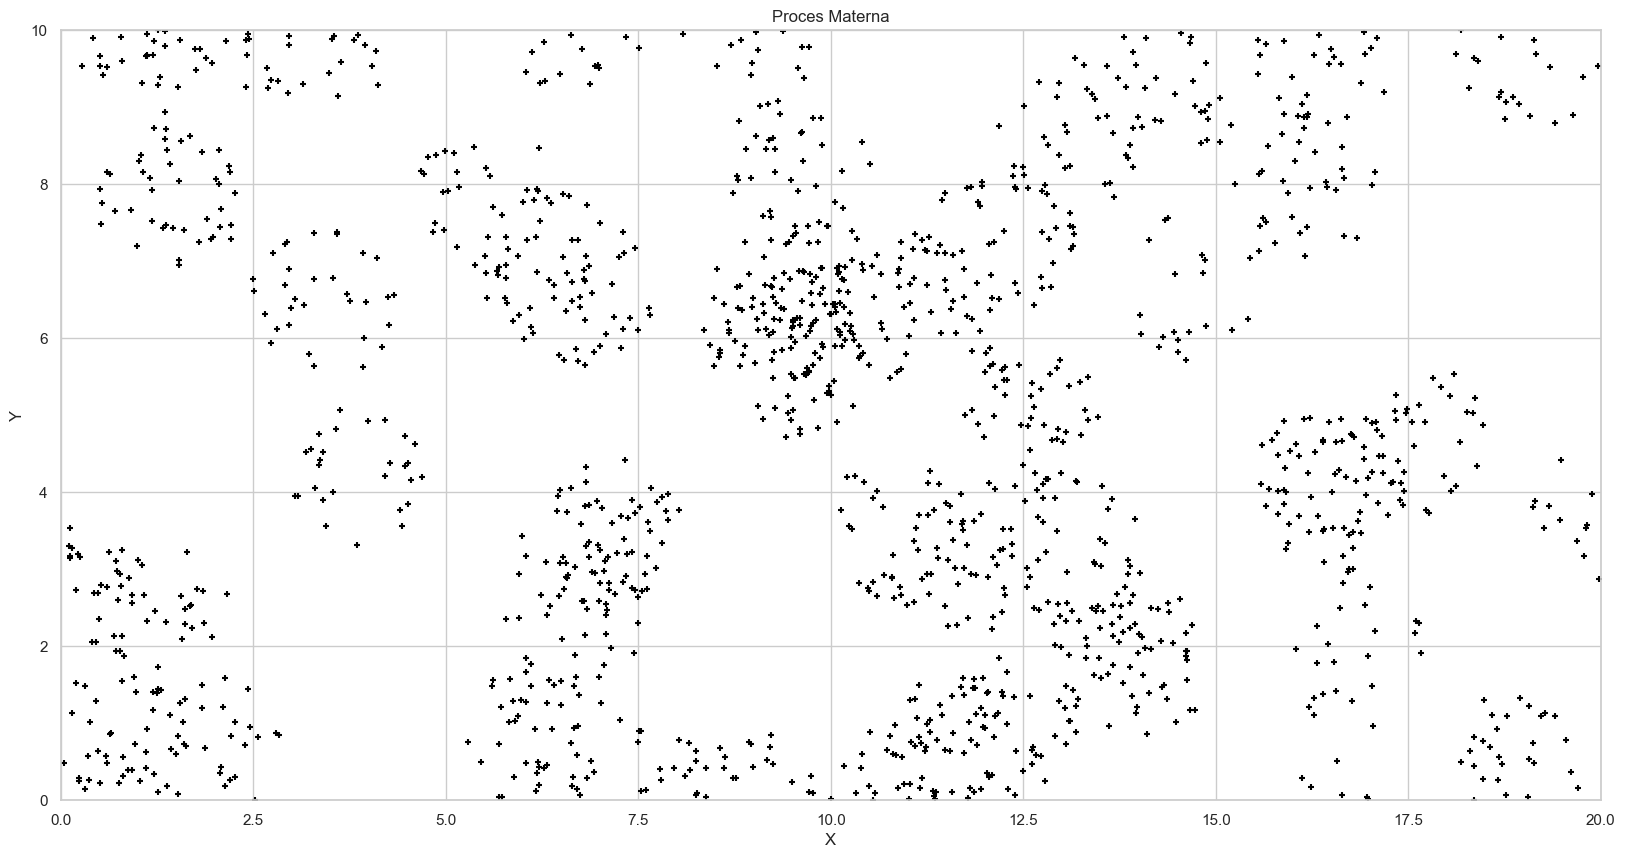

In [19]:
# YOUR CODE HERE
fig,ax = plt.subplots(1, 1, figsize = (20,10))
ax.scatter(materna["X"], materna["Y"], c = "black", s = 25, marker = "+")
ax.axis("square")
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.set_title("Proces Materna")
ax.set_xlabel("X")
ax.set_ylabel("Y")
#raise NotImplementedError()

### Zadanie 5: Proces punktowy Thomasa w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `thomas_on_rectangle()`, która będzie generować proces punktowy Thomasa w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor, którego wielkość jest zależna od wartości parametru `cluster_sigma` (na potrzeby zadania przyjmijmy 4-krotność wartości tego parametru).
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Dla każdego z wygenerowanych punktów (centrów klastrów):
    - Losujemy liczbę punktów znajdujących się w obrębie danego klastra $n_c$ z rozkładu Poissona o wartości oczekiwanej równej wartości parametru `mean_cluster_size`.
    - Niezależnie od siebie losujemy wartości współrzędnych $n_c$ punktów z rozkładów normalnych o wartości oczekiwanej równej współrzędnej punktu stanowiącego centrum klastra i odchyleniu standardowym równym wartości parametru `cluster_sigma`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - średnia liczebność klastra: 30
 - odchylenie standardowe klastra: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [20]:
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):

    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
#     x_lim[0] -=cluster_sigma*4
#     x_lim[1] +=cluster_sigma*4
#     y_lim[0] -=cluster_sigma*4
#     y_lim[1] +=cluster_sigma*4
    
#     parent_array = homogeneous_poisson_on_rectangle(parent_intensity, x_lim, y_lim)
    
#     x_cluster = np.empty((1,1))
#     y_cluster = np.empty((1,1))

#     for i in range(0, len(parent_array)):
#         m_c = np.random.poisson(mean_cluster_size)
#         for j in range(0, m_c):
#                 x = np.random.normal(parent_array['X'][i], cluster_sigma)
#                 y = np.random.normal(parent_array['Y'][i], cluster_sigma)
#                 x_cluster = np.append(x_cluster, x)
#                 y_cluster = np.append(y_cluster, y)
                
#     m = 0
#     while(True):
#         if x_cluster[m]<(x_lim[0]+cluster_sigma) or x_cluster[m]>(x_lim[1]-cluster_sigma)or y_cluster[m]<(y_lim[0]+cluster_sigma) or y_cluster[m]>(y_lim[1]-cluster_sigma):
#             x_cluster = np.delete(x_cluster, m)
#             y_cluster = np.delete(y_cluster, m)
#             m-=1
#         m+=1
#         if m == len(x_cluster):
#             break
            
#     array = pd.DataFrame(data={"X":x_cluster, "Y":y_cluster})

#     return array
        
    a = [x_lim[0] - 4*cluster_sigma, x_lim[1] + 4*cluster_sigma]
    b = [y_lim[0] - 4*cluster_sigma, y_lim[1] + 4*cluster_sigma]
    parents = homogeneous_poisson_on_rectangle(parent_intensity, a, b)
    
    X=[]
    Y=[]

    for i in range (0, len(parents)):
        nc = np.random.poisson(mean_cluster_size)
        x = np.random.normal(parents.iat[i,0], cluster_sigma, size = nc)
        y = np.random.normal(parents.iat[i,1], cluster_sigma, size = nc)
        X = np.append(X, x)
        Y = np.append(Y, y)
        
    xyl = {'X':X, 'Y':Y}
    xy = pd.DataFrame(xyl)

    
    xy = xy.loc[xy['X'] <= x_lim[1]]
    xy = xy.loc[xy['X'] >= x_lim[0]]
    xy = xy.loc[xy['Y'] >= y_lim[0]]
    xy = xy.loc[xy['Y'] <= y_lim[1]]
    
    xy = xy.reset_index(drop=True)

    return xy

    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [21]:
# YOUR CODE HERE
thomas = thomas_on_rectangle(0.2, 30, 0.5, [0, 20], [0, 10])
thomas
#raise NotImplementedError()

,X,Y
0,15.491393,6.158939
1,15.267904,7.094236
2,15.872346,6.400175
3,15.357752,6.833641
4,15.383200,6.919568
...,...,...
1683,6.060613,2.458469
1684,5.128159,2.328341
1685,5.890748,2.245389
1686,5.342559,1.694941


#### c) Wizualizacja

Text(0, 0.5, 'Y')

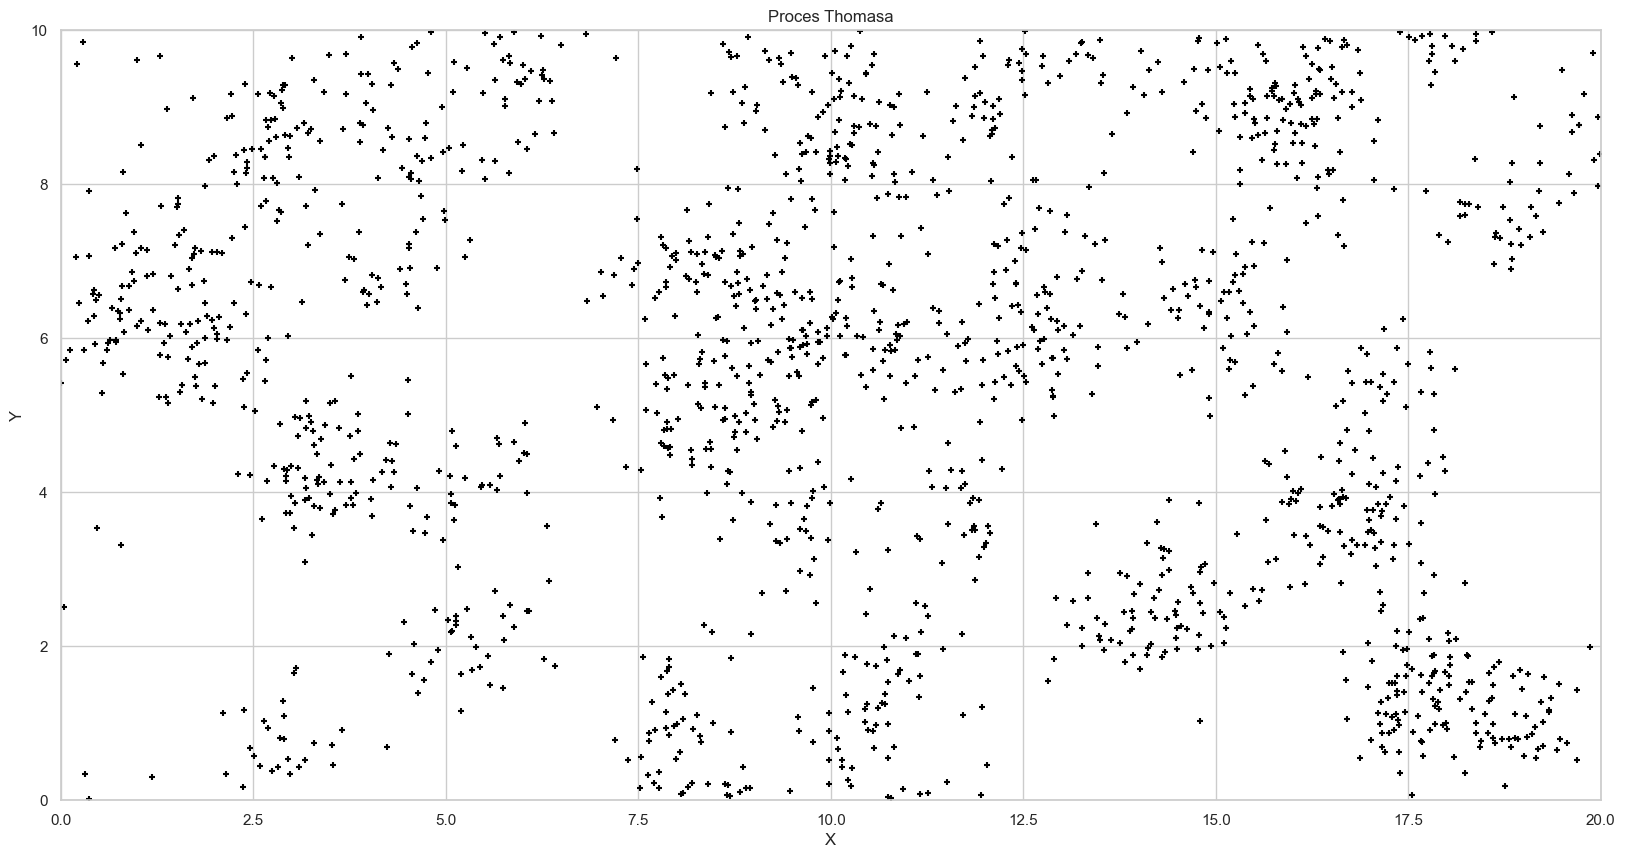

In [22]:
# YOUR CODE HERE
fig,ax = plt.subplots(1, 1, figsize = (20,10))
ax.scatter(thomas["X"], thomas["Y"], c = "black", s = 25, marker = "+")
ax.axis("square")
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.set_title("Proces Thomasa")
ax.set_xlabel("X")
ax.set_ylabel("Y")
#raise NotImplementedError()